In [1]:
import requests
import pandas as pd
%matplotlib inline
token = 'YC05QBBCPWE32UZI'

In [3]:
#Cotação diária
function = 'TIME_SERIES_DAILY'
symbol = 'FLMA11.SA'
outputsize = 'full'
url = 'https://www.alphavantage.co/query?function=' + function + '&symbol=' + symbol + '&outputsize=' + outputsize + '&apikey=' + token
resp = requests.get(url=url)
data = resp.json()

df = pd.DataFrame(data)
df = df.drop(['Meta Data'], axis = 1).dropna()

#Transforma string para lista
df['Time Series'] = df['Time Series (Daily)'].apply(lambda x: str(x).strip("{}").split(', '))

#Transforma lista em colunas
df[['open','high','low','close','volume']] = pd.DataFrame(df['Time Series'].values.tolist(), index = df.index)

#Converte para números
df.open = df.open.apply(lambda x: float(list(x.split(': '))[1].strip("''")))
df.high = df.high.apply(lambda x: float(list(x.split(': '))[1].strip("''")))
df.low = df.low.apply(lambda x: float(list(x.split(': '))[1].strip("''")))
df.close = df.close.apply(lambda x: float(list(x.split(': '))[1].strip("''")))
df.volume = df.volume.apply(lambda x: int(list(x.split(': '))[1].strip("''")))

#Remove colunas iniciais
df = df.drop(['Time Series (Daily)','Time Series'], axis = 1)
df.head()

,open,high,low,close,volume
2014-08-06,1.95,2.03,1.95,2.03,4211
2014-08-07,2.03,2.03,2.03,2.03,795
2014-08-08,2.04,2.10,2.04,2.09,1378
2014-08-11,2.08,2.08,2.08,2.08,46
2014-08-12,2.07,2.07,2.05,2.05,745


In [9]:
df.iloc[-180:].describe()

,open,high,low,close,volume
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,3.382556,3.416556,3.350167,3.389556,49772.583333
std,0.494392,0.500404,0.487666,0.493316,30246.253960
min,2.450000,2.500000,2.430000,2.440000,5820.000000
25%,2.960000,2.960000,2.937500,2.960000,27715.250000
50%,3.500000,3.540000,3.500000,3.505000,40326.000000
75%,3.650000,3.685000,3.622500,3.650000,65709.000000
max,4.300000,4.390000,4.260000,4.300000,162345.000000


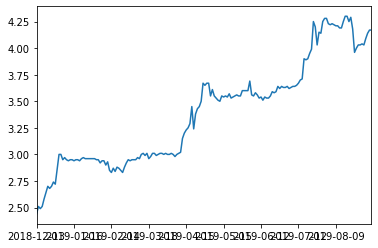

In [8]:
df.iloc[-180:].close.plot.line()